In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math

# Многоклассовая классификация

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
X = iris.data
Y = iris.target

In [8]:
from sklearn.linear_model import SGDClassifier
SGDclf = SGDClassifier (random_state = 42)

In [9]:
SGDclf.fit(X,Y)

SGDClassifier(random_state=42)

In [10]:
SGDclf.score(X,Y)

0.9333333333333333

In [11]:
pred = SGDclf.predict(X)

In [12]:
cm = confusion_matrix(Y, pred)# метрики
cm

array([[50,  0,  0],
       [ 2, 46,  2],
       [ 0,  6, 44]], dtype=int64)

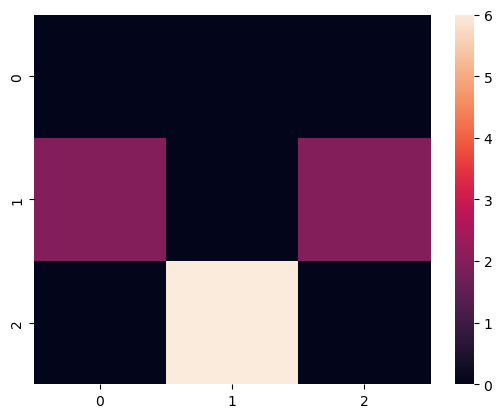

In [15]:
np.fill_diagonal(cm, 0)
sns.heatmap(cm);

In [17]:
# макро - считает метрики для каждой метки и берет среднее значение. 
precision_score(Y,pred, average = 'macro'), recall_score(Y,pred, average = 'macro'), f1_score(Y,pred, average = 'macro')
# макро посчитает один по всем, в микро усреднение

(0.9342251950947604, 0.9333333333333332, 0.9330065359477123)

In [18]:
cm[0,0] = cm[1,1] = cm[2,2] = 0 # подсветка ошибок

### OvR

In [36]:
SGDclf.decision_function([X[65]])

array([[ -48.37069287,  -11.74964287, -212.39143969]])

In [37]:
SGDclf.predict([X[65]])

array([1])

In [38]:
X[65]

array([6.7, 3.1, 4.4, 1.4])

### OvO

In [24]:
from sklearn.multiclass import OneVsOneClassifier 

In [25]:
ovoSGD = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovoSGD.fit(X,Y)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [30]:
ovoSGD.decision_function([X[65]])

array([[-0.33041254,  2.3324053 ,  0.66802136]])

In [32]:
ovoSGD.predict([X[65]])

array([1])

In [33]:
ovoSGD.estimators_

(SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42))

In [34]:
pred = ovoSGD.predict(X)

In [35]:
precision_score(Y,pred, average = 'macro'), recall_score(Y,pred, average = 'macro'), f1_score(Y,pred, average = 'macro') 

(0.9871794871794872, 0.9866666666666667, 0.9866613311991462)

# Регрессия и регуляризация

In [61]:
from sklearn.linear_model import SGDRegressor

In [66]:
# генерируем данные
X = 2*np.linspace(0,2,100)
y = 2.5+(3*X).reshape(-1,1) + 2.5*np.random.rand(100,1) # шум
#y = 2.5+3*X[:,0]*X[:,0] + np.random.randn(100,1) # шум
X_b = np.c_[np.ones((100,1)),X]  
y = y.reshape(100)

X1 = 2*np.linspace(0,2,30)
y1 = 2.7+(3*X1).reshape(-1,1) + .5*np.random.randn(30,1) # шум
#y = 2.5+3*X[:,0]*X[:,0] + np.random.randn(100,1) # шум
y1 = y1.reshape(30)


In [80]:
X_train, X_test = X, X1 
Y_train,  Y_test =  y, y1

In [115]:
SGDR = SGDRegressor(penalty = 'l1', alpha = 1.5,)# l1_ratio = 0.8)

SGDR.fit(X_train.reshape(-1,1), Y_train)

preds = SGDR.predict(X_test.reshape(-1,1))

mse = mean_squared_error(Y_test, preds)
rmse_test = math.sqrt(mse)

preds = SGDR.predict(X_train.reshape(-1,1))
mse = mean_squared_error(Y_train, preds)
rmse_train = math.sqrt(mse)

rmse_train, rmse_test

(0.8899699212613087, 1.0631949943589958)

In [116]:
SGDR.coef_ , SGDR.intercept_

(array([2.73672016]), array([3.91157509]))

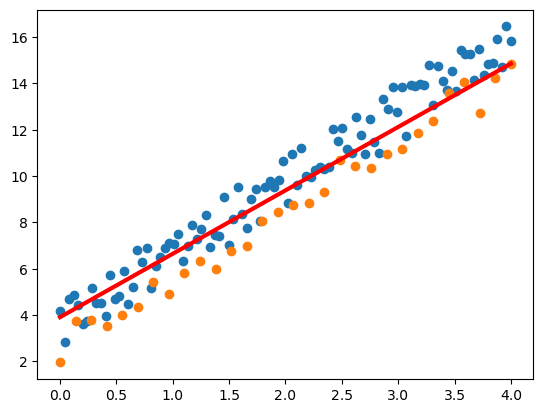

In [117]:
plt.scatter(X,y)
plt.scatter(X1,y1)
plt.plot(X_test, SGDR.predict(X_test.reshape(-1,1)), color = 'red', linewidth = 3)

In [118]:
#SGDR.coef_ , SGDR.intercept_

## Логистическая регрессия

In [121]:
x = np.linspace(-7,7, 100)
y = np.linspace(-2,2, 100)
v = np.linspace(-2,2, 100)
for i in range(100):
    y[i] = 1/(1+math.exp(-x[i]))
    v[i] = 0.5


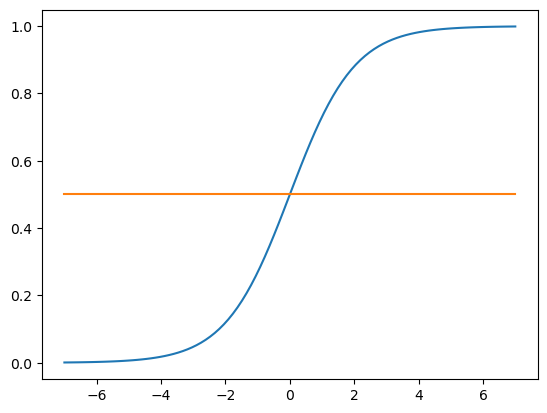

In [122]:
plt.plot(x,y)
plt.plot(x,v)

In [123]:
x = np.linspace(0.001, 1, 100)
y = np.linspace(0.001, 1, 100)

for i in range(100):
    y[i] = - math.log(x[i])


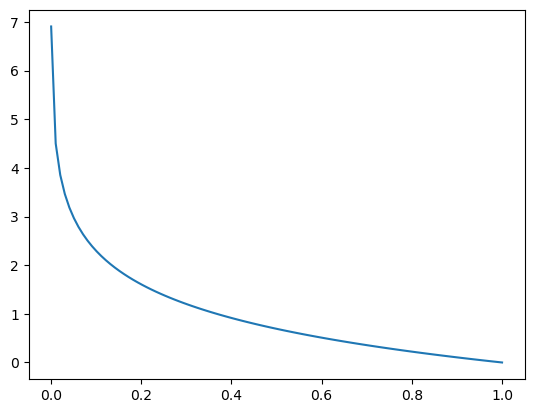

In [124]:
plt.plot(x,y)

In [139]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int32)

In [140]:
from sklearn.linear_model import LogisticRegression 
logReg = LogisticRegression()

In [141]:
logReg.fit(X,y)

LogisticRegression()

In [145]:
logReg.predict([X[78]])

array([0])

In [153]:
logReg.predict_proba([X[78]])

array([[0.66709636, 0.33290364]])

In [154]:
logReg.predict_proba([X[78]]).sum()

1.0

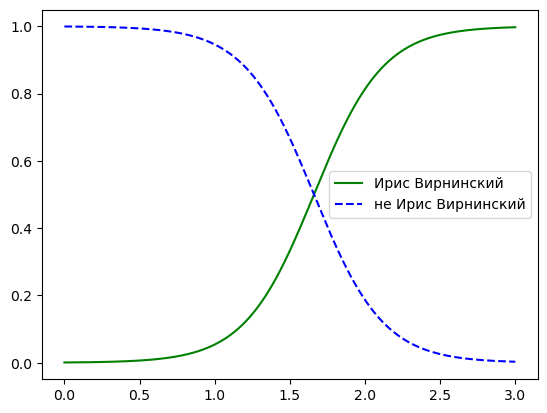

In [155]:
Xnew = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = logReg.predict_proba(Xnew)
plt.plot(Xnew, y_proba[:,1], 'g-', label = 'Ирис Вирнинский')
plt.plot(Xnew, y_proba[:,0], 'b--', label = 'не Ирис Вирнинский');
plt.legend()

In [156]:
# граница уверенных решений менее 1 и более 2,
# внутри интервала классификатор менее уверен

In [159]:
logReg.predict_proba([[1.5],[1.7]])

array([[0.66709636, 0.33290364],
       [0.45722097, 0.54277903]])

In [158]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])